🎮 REGRESIÓN LINEAL MULTIVARIADA - VENTAS DE VIDEOJUEGOS
Dataset: vgsales.csv

📦 Importar librerías necesarias

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

📥 Cargar el dataset

In [74]:
df = pd.read_csv('vgsales.csv')
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


1. Limpieza de datos
Revisar duplicados

In [75]:
print("Duplicados:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicados: 0


Revisar valores nulos

In [76]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


Eliminar filas con valores nulos (si existen)

In [77]:
df = df.dropna()

Verificar nuevamente si hay valores nulos

In [78]:
if df.isnull().sum().any():
    raise ValueError("El dataset contiene valores nulos después de la limpieza.")

2. Estadísticas básicas

In [79]:
print("Resumen estadístico:")
display(df.describe())

Resumen estadístico:


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Columnas disponibles

In [80]:
print("Columnas disponibles:", df.columns.tolist())

Columnas disponibles: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


3. Codificación de variables categóricas (One-Hot Encoding)

In [81]:
df_encoded = pd.get_dummies(df, columns=['Platform', 'Genre', 'Publisher'], drop_first=True)
print("Primeras filas del dataset codificado:")
display(df_encoded.head())

Primeras filas del dataset codificado:


,Rank,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,1,Wii Sports,2006.0,41.49,29.02,3.77,8.46,82.74,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Super Mario Bros.,1985.0,29.08,3.58,6.81,0.77,40.24,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Mario Kart Wii,2008.0,15.85,12.88,3.79,3.31,35.82,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Wii Sports Resort,2009.0,15.75,11.01,3.28,2.96,33.00,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Pokemon Red/Pokemon Blue,1996.0,11.27,8.89,10.22,1.00,31.37,False,False,...,False,False,False,False,False,False,False,False,False,False


4. Visualización de la variable objetivo: estimar las stimar las ventas globales de videojuegos

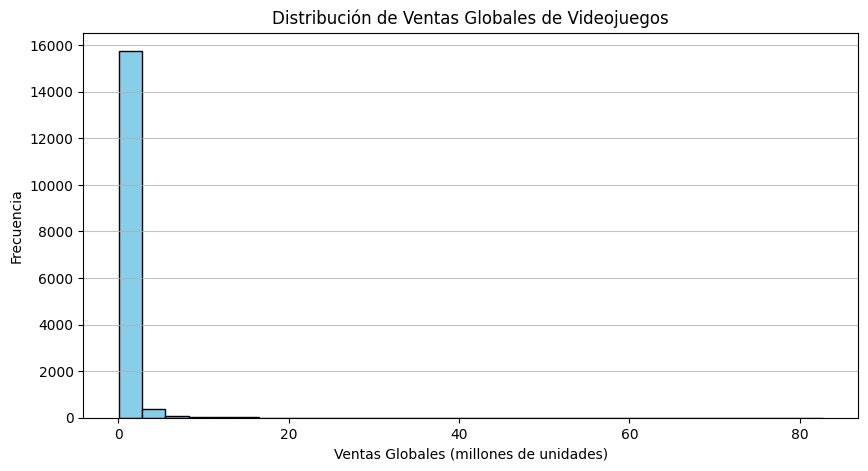

In [82]:
plt.figure(figsize=(10, 5))
plt.hist(df['Global_Sales'], bins=30, color='skyblue', edgecolor='black')

plt.title("Distribución de Ventas Globales de Videojuegos")
plt.xlabel("Ventas Globales (millones de unidades)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.75)
plt.show()

5. Matriz de correlación

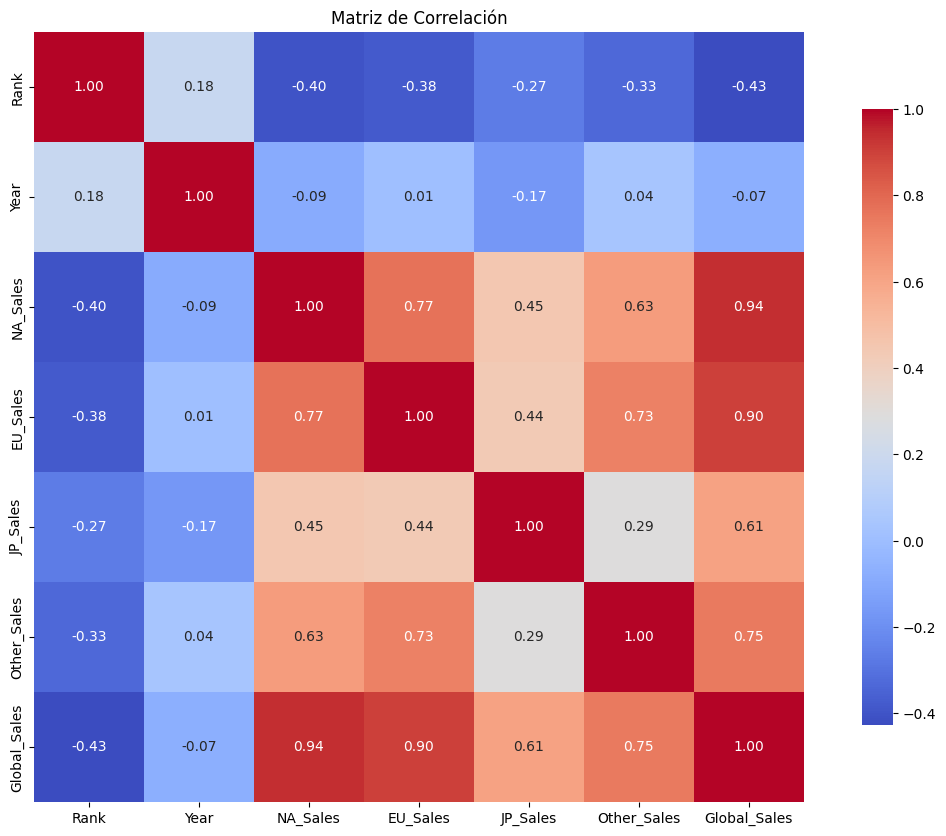

In [83]:
plt.figure(figsize=(15, 10))
numeric_columns = df_encoded.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlación")
plt.show()

ENTRENAMIENTO DEL MODELO DE REGRESIÓN LINEAL

1. Preparar datos

Asegurarse de que todas las columnas sean numéricas

In [84]:
X = df_encoded.drop("Global_Sales", axis=1).select_dtypes(include=[np.number]).values
y = df_encoded["Global_Sales"].values
m = len(y)

Normalizar las características para mejorar la convergencia

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Añadir columna de unos (bias)

In [86]:
X_b = np.c_[np.ones((m, 1)), X]
print("Shape de X con bias:", X_b.shape)

Shape de X con bias: (16291, 7)


2. Inicializar parámetros

In [ ]:
alpha = 0.0001         # tasa de aprendizaje
iterations = 14000      # iteraciones
theta = np.zeros(X_b.shape[1])

3. Definir funciones

In [88]:
def compute_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return loss

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    loss_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y
        gradient = (1 / m) * X.T.dot(error)
        theta -= alpha * gradient
        loss_history.append(compute_loss(X, y, theta))

        if i % 500 == 0:
            print(f"Iteración {i}: Error = {loss_history[-1]:.4f}")

    return theta, loss_history

4. Entrenar modelo

In [89]:
theta_final, loss_history = gradient_descent(X_b, y, theta, alpha, iterations)


Iteración 0: Error = 1.3744
Iteración 500: Error = 1.3388
Iteración 1000: Error = 1.3041
Iteración 1500: Error = 1.2705
Iteración 2000: Error = 1.2377
Iteración 2500: Error = 1.2059
Iteración 3000: Error = 1.1750
Iteración 3500: Error = 1.1450
Iteración 4000: Error = 1.1158
Iteración 4500: Error = 1.0874
Iteración 5000: Error = 1.0598
Iteración 5500: Error = 1.0329
Iteración 6000: Error = 1.0069
Iteración 6500: Error = 0.9815
Iteración 7000: Error = 0.9569
Iteración 7500: Error = 0.9329
Iteración 8000: Error = 0.9096
Iteración 8500: Error = 0.8870
Iteración 9000: Error = 0.8649
Iteración 9500: Error = 0.8435
Iteración 10000: Error = 0.8227
Iteración 10500: Error = 0.8025
Iteración 11000: Error = 0.7828
Iteración 11500: Error = 0.7636
Iteración 12000: Error = 0.7450
Iteración 12500: Error = 0.7269
Iteración 13000: Error = 0.7093
Iteración 13500: Error = 0.6922


5. Gráfico de convergencia

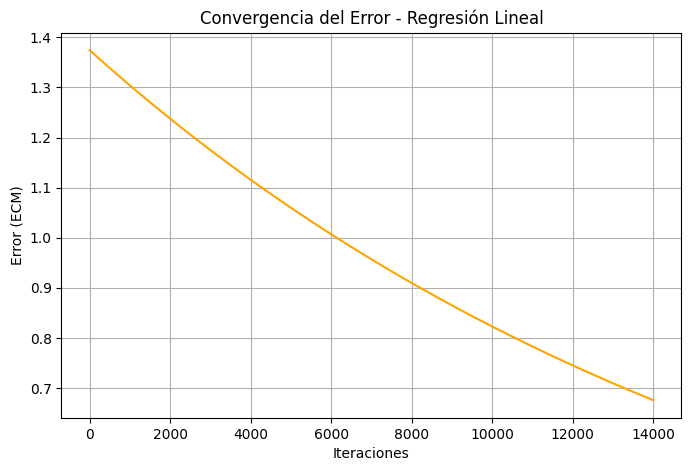

In [90]:
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), loss_history, color='orange')
plt.title("Convergencia del Error - Regresión Lineal")
plt.xlabel("Iteraciones")
plt.ylabel("Error (ECM)")
plt.grid(True)
plt.show()

6. Evaluación con R²

In [91]:
from sklearn.metrics import r2_score
y_pred = X_b.dot(theta_final)
r2 = r2_score(y, y_pred)
print(f"Coeficiente de determinación R²: {r2:.4f}")


Coeficiente de determinación R²: 0.4499
